In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load CSV
df = pd.read_csv(r"C:\Users\aican\2025-Ironhack\Unit7-2025-CW-21-22\Unit7-D1-2025-05-23\Project - ML - Unit 7\Agrofood_co2_emission.csv")

In [2]:
# Columns I want to keep (columns that may relate to climate change, especially from animal agriculture):
# Manure Management                   928 Nans
# Manure applied to Soils             928
# Manure left on Pasture                0
# On-farm energy use                  956
# total_emission                        0

# I want to fill NaNs for Manure Management, Manure applied to Soils and On-farm energy use.

In [3]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [4]:
# Count NaN values in "Manure Management" for each country  
nan_counts = df.groupby("Area")["Manure Management"].apply(lambda x: x.isna().sum())  

# Sort countries by most NaNs  
nan_counts_sorted = nan_counts.sort_values(ascending=False)  

# Display result  
print(nan_counts_sorted)

Area
Maldives                     31
Saint Pierre and Miquelon    31
Holy See                     31
Guam                         31
Channel Islands              31
                             ..
Grenada                       0
Guatemala                     0
Guinea                        0
Guinea-Bissau                 0
Zimbabwe                      0
Name: Manure Management, Length: 236, dtype: int64


In [5]:
print(nan_counts_sorted.head(50))

Area
Maldives                                        31
Saint Pierre and Miquelon                       31
Holy See                                        31
Guam                                            31
Channel Islands                                 31
Cayman Islands                                  31
Greenland                                       31
Gibraltar                                       31
Isle of Man                                     31
British Virgin Islands                          31
Turks and Caicos Islands                        31
San Marino                                      31
Montserrat                                      31
Monaco                                          31
United States Virgin Islands                    31
Bermuda                                         31
Mayotte                                         31
Wallis and Futuna Islands                       31
Falkland Islands (Malvinas)                     31
American Samoa            

In [6]:
# Count NaN values in "Manure applied to Soils" for each country  
nan_counts_manure_soils = df.groupby("Area")["Manure applied to Soils"].apply(lambda x: x.isna().sum())  

# Sort countries by most NaNs  
nan_counts_sorted_manure_soils = nan_counts.sort_values(ascending=False)  

print(nan_counts_sorted_manure_soils.head(50))

Area
Maldives                                        31
Saint Pierre and Miquelon                       31
Holy See                                        31
Guam                                            31
Channel Islands                                 31
Cayman Islands                                  31
Greenland                                       31
Gibraltar                                       31
Isle of Man                                     31
British Virgin Islands                          31
Turks and Caicos Islands                        31
San Marino                                      31
Montserrat                                      31
Monaco                                          31
United States Virgin Islands                    31
Bermuda                                         31
Mayotte                                         31
Wallis and Futuna Islands                       31
Falkland Islands (Malvinas)                     31
American Samoa            

In [7]:
# Count NaN values in "On-farm energy use" for each country  
nan_counts_farm_energy = df.groupby("Area")["On-farm energy use"].apply(lambda x: x.isna().sum())  

# Sort countries by most NaNs  
nan_counts_sorted_farm_energy = nan_counts.sort_values(ascending=False)  

print(nan_counts_sorted_farm_energy.head(50))

Area
Maldives                                        31
Saint Pierre and Miquelon                       31
Holy See                                        31
Guam                                            31
Channel Islands                                 31
Cayman Islands                                  31
Greenland                                       31
Gibraltar                                       31
Isle of Man                                     31
British Virgin Islands                          31
Turks and Caicos Islands                        31
San Marino                                      31
Montserrat                                      31
Monaco                                          31
United States Virgin Islands                    31
Bermuda                                         31
Mayotte                                         31
Wallis and Futuna Islands                       31
Falkland Islands (Malvinas)                     31
American Samoa            

In [8]:
df["Manure applied to Soils"] = df["Manure applied to Soils"].fillna(df["Manure applied to Soils"].mean())
df["Manure Management"] = df["Manure Management"].fillna(df["Manure Management"].mean())
df["On-farm energy use"] = df["On-farm energy use"].fillna(df["On-farm energy use"].mean())

In [9]:
df = df.dropna()

In [10]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [11]:
# We use KNN.
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
df_dummies = pd.get_dummies(df[["Area", "Year"]])

In [13]:
df_dummies

,Year,Area_Afghanistan,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,...,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yemen,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
0,1990,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1991,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1992,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1993,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1994,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6961,2017,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6962,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6963,2019,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# Perform Train Test Split
# I will not use this code: features_numerical = df.select_dtypes(include=["number"]) because this will select also "Year", which is categorical.

In [15]:
features = df[["Savanna fires", "Forest fires", "Crop Residues", "Rice Cultivation",
    "Drained organic soils (CO2)", "Pesticides Manufacturing", "Food Transport",
    "Forestland", "Net Forest conversion", "Food Household Consumption", "Food Retail",
    "On-farm Electricity Use", "Food Packaging", "Agrifood Systems Waste Disposal",
    "Food Processing", "Fertilizers Manufacturing", "IPPU", "Manure applied to Soils",
    "Manure left on Pasture", "Manure Management", "Fires in organic soils",
    "Fires in humid tropical forests", "On-farm energy use", "Rural population",
    "Urban population", "Total Population - Male", "Total Population - Female", "total_emission"]]

In [16]:
############################
##########################
########################
features = df.drop(columns = ['Area','Average Temperature °C'])

In [17]:
features

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,1590.5319,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539
1,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,1657.2364,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629
2,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,1653.5068,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229
3,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,1642.9623,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529
4,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,1689.3593,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,2721.1459,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,2744.8763,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,2790.0949,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,2828.7215,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799


In [18]:
target = df["Average Temperature °C"]

In [19]:
target

0       0.536167
1       0.020667
2      -0.259583
3       0.101917
4       0.372250
          ...   
6960    1.120250
6961    0.046500
6962    0.516333
6963    0.985667
6964    0.189000
Name: Average Temperature °C, Length: 5125, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [21]:
X_train.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
normalizer = MinMaxScaler()

In [24]:
normalizer.fit(X_train)

MinMaxScaler()

In [25]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [26]:
X_train

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,1997,3.4193,31.2029,13.6407,419.400800,398.4895,3.000000,5.0235,-89.0096,2934.2214,...,46.7348,10.3311,0.0,31.2029,873.876500,154006.0,301948.0,226598.0,226288.0,8856.085867
633,2009,7.0241,27.0949,4.9563,3.589900,154.5093,17.000000,32.8573,-4.9610,3067.7020,...,41.8649,6.6714,0.0,27.0949,52.164900,171893.0,142036.0,157247.0,156923.0,9729.664652
4003,1999,0.0108,0.0000,0.1566,0.000000,0.0000,15.000000,78.7747,-22.9373,0.0000,...,42.2850,7.9181,0.0,0.0000,7.046300,672510.0,503064.0,602736.0,602678.0,6192.139067
5043,2015,0.2719,0.5216,1273.3988,1463.391166,28508.5513,804.000000,4644.8195,-40078.8667,0.0000,...,741.1885,4332.4279,0.0,0.0000,13458.088900,15199849.0,23065377.0,18660163.0,19892982.0,124076.085866


In [27]:
X_train_norm

array([[6.66666667e-02, 4.59274585e-04, 1.09693086e-03, ...,
        7.28618067e-03, 7.42737761e-03, 1.12325828e-01],
       [7.66666667e-01, 4.01377111e-04, 0.00000000e+00, ...,
        3.65151072e-03, 3.89301740e-03, 1.16304815e-01],
       [2.00000000e-01, 2.09394116e-08, 8.34424221e-06, ...,
        2.76669898e-03, 3.23131856e-03, 1.13466445e-01],
       ...,
       [3.00000000e-01, 9.42273522e-08, 0.00000000e+00, ...,
        7.64810803e-04, 7.97205546e-04, 1.13509109e-01],
       [8.33333333e-01, 2.37226084e-06, 9.98705080e-06, ...,
        2.50501525e-02, 2.78406526e-02, 1.47123030e-01],
       [4.00000000e-01, 2.65837818e-02, 1.97115222e-02, ...,
        1.05797355e-02, 1.11864192e-02, 1.27011686e-01]])

In [28]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [29]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [30]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.066667,4.592746e-04,0.001097,0.001287,0.008168,0.000000,0.006499,0.007748,0.811973,0.000075,...,0.024751,0.006258,0.0,0.001002,0.004122,0.003121,0.008759,0.007286,0.007427,0.112326
1,0.766667,4.013771e-04,0.000000,0.003849,0.004244,0.000000,0.017133,0.011914,0.823278,0.000000,...,0.015840,0.011418,0.0,0.000000,0.012090,0.003008,0.002922,0.003652,0.003893,0.116305
2,0.200000,2.093941e-08,0.000008,0.003695,0.002598,0.000803,0.004678,0.001515,0.822840,0.000000,...,0.002092,0.006756,0.0,0.000000,0.003203,0.002579,0.002184,0.002767,0.003231,0.113466
3,0.966667,3.768387e-04,0.000545,0.000926,0.000231,0.002796,0.003767,0.008680,0.822997,0.002383,...,0.007032,0.001678,0.0,0.000480,0.000258,0.001500,0.003163,0.002803,0.002916,0.114725
4,0.433333,9.334353e-05,0.000025,0.040274,0.008874,0.109838,0.063187,0.142933,0.809269,0.000000,...,0.050777,0.086297,0.0,0.000000,0.005754,0.013676,0.052378,0.039120,0.042750,0.151517


In [31]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.833333,0.076545,0.194546,0.020527,0.030460,0.019107,0.000000,0.007625,0.823278,0.029233,...,0.145236,0.015666,0.00000,0.112734,0.000297,0.040934,0.018859,0.034734,0.037359,0.144355
1,0.933333,0.004372,0.061969,0.117752,0.013464,0.157689,0.111975,0.299299,0.739916,0.059882,...,0.043930,0.108475,0.00000,0.000000,0.081962,0.007632,0.033325,0.024688,0.026090,0.179298
2,0.666667,0.002703,0.020592,0.076200,0.224433,0.016523,0.028191,0.050428,0.836587,0.000000,...,0.028363,0.100687,0.00032,0.006974,0.007270,0.068394,0.029807,0.057850,0.062145,0.148362
3,0.433333,0.001390,0.000000,0.009447,0.000311,0.000000,0.000705,0.000358,0.823202,0.000813,...,0.052080,0.007411,0.00000,0.000000,0.012090,0.011777,0.002255,0.008711,0.008910,0.114537
4,0.733333,0.141872,0.184227,0.262363,0.026617,0.001941,0.397108,0.371853,0.287060,0.486512,...,0.947179,0.173820,0.00000,0.181539,0.085676,0.033595,0.188790,0.132463,0.142178,0.302133


In [32]:
# Use KNN as our predictive model.

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knn = KNeighborsRegressor(n_neighbors=10)

In [35]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [36]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

C:\Users\aican\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aican\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

0.46903469970031453

In [37]:
# Feature Selection
#  selection of features based on correlactions between themselves but also with the target.
# We want low correlaction between features, but high correlaction between features and our target.

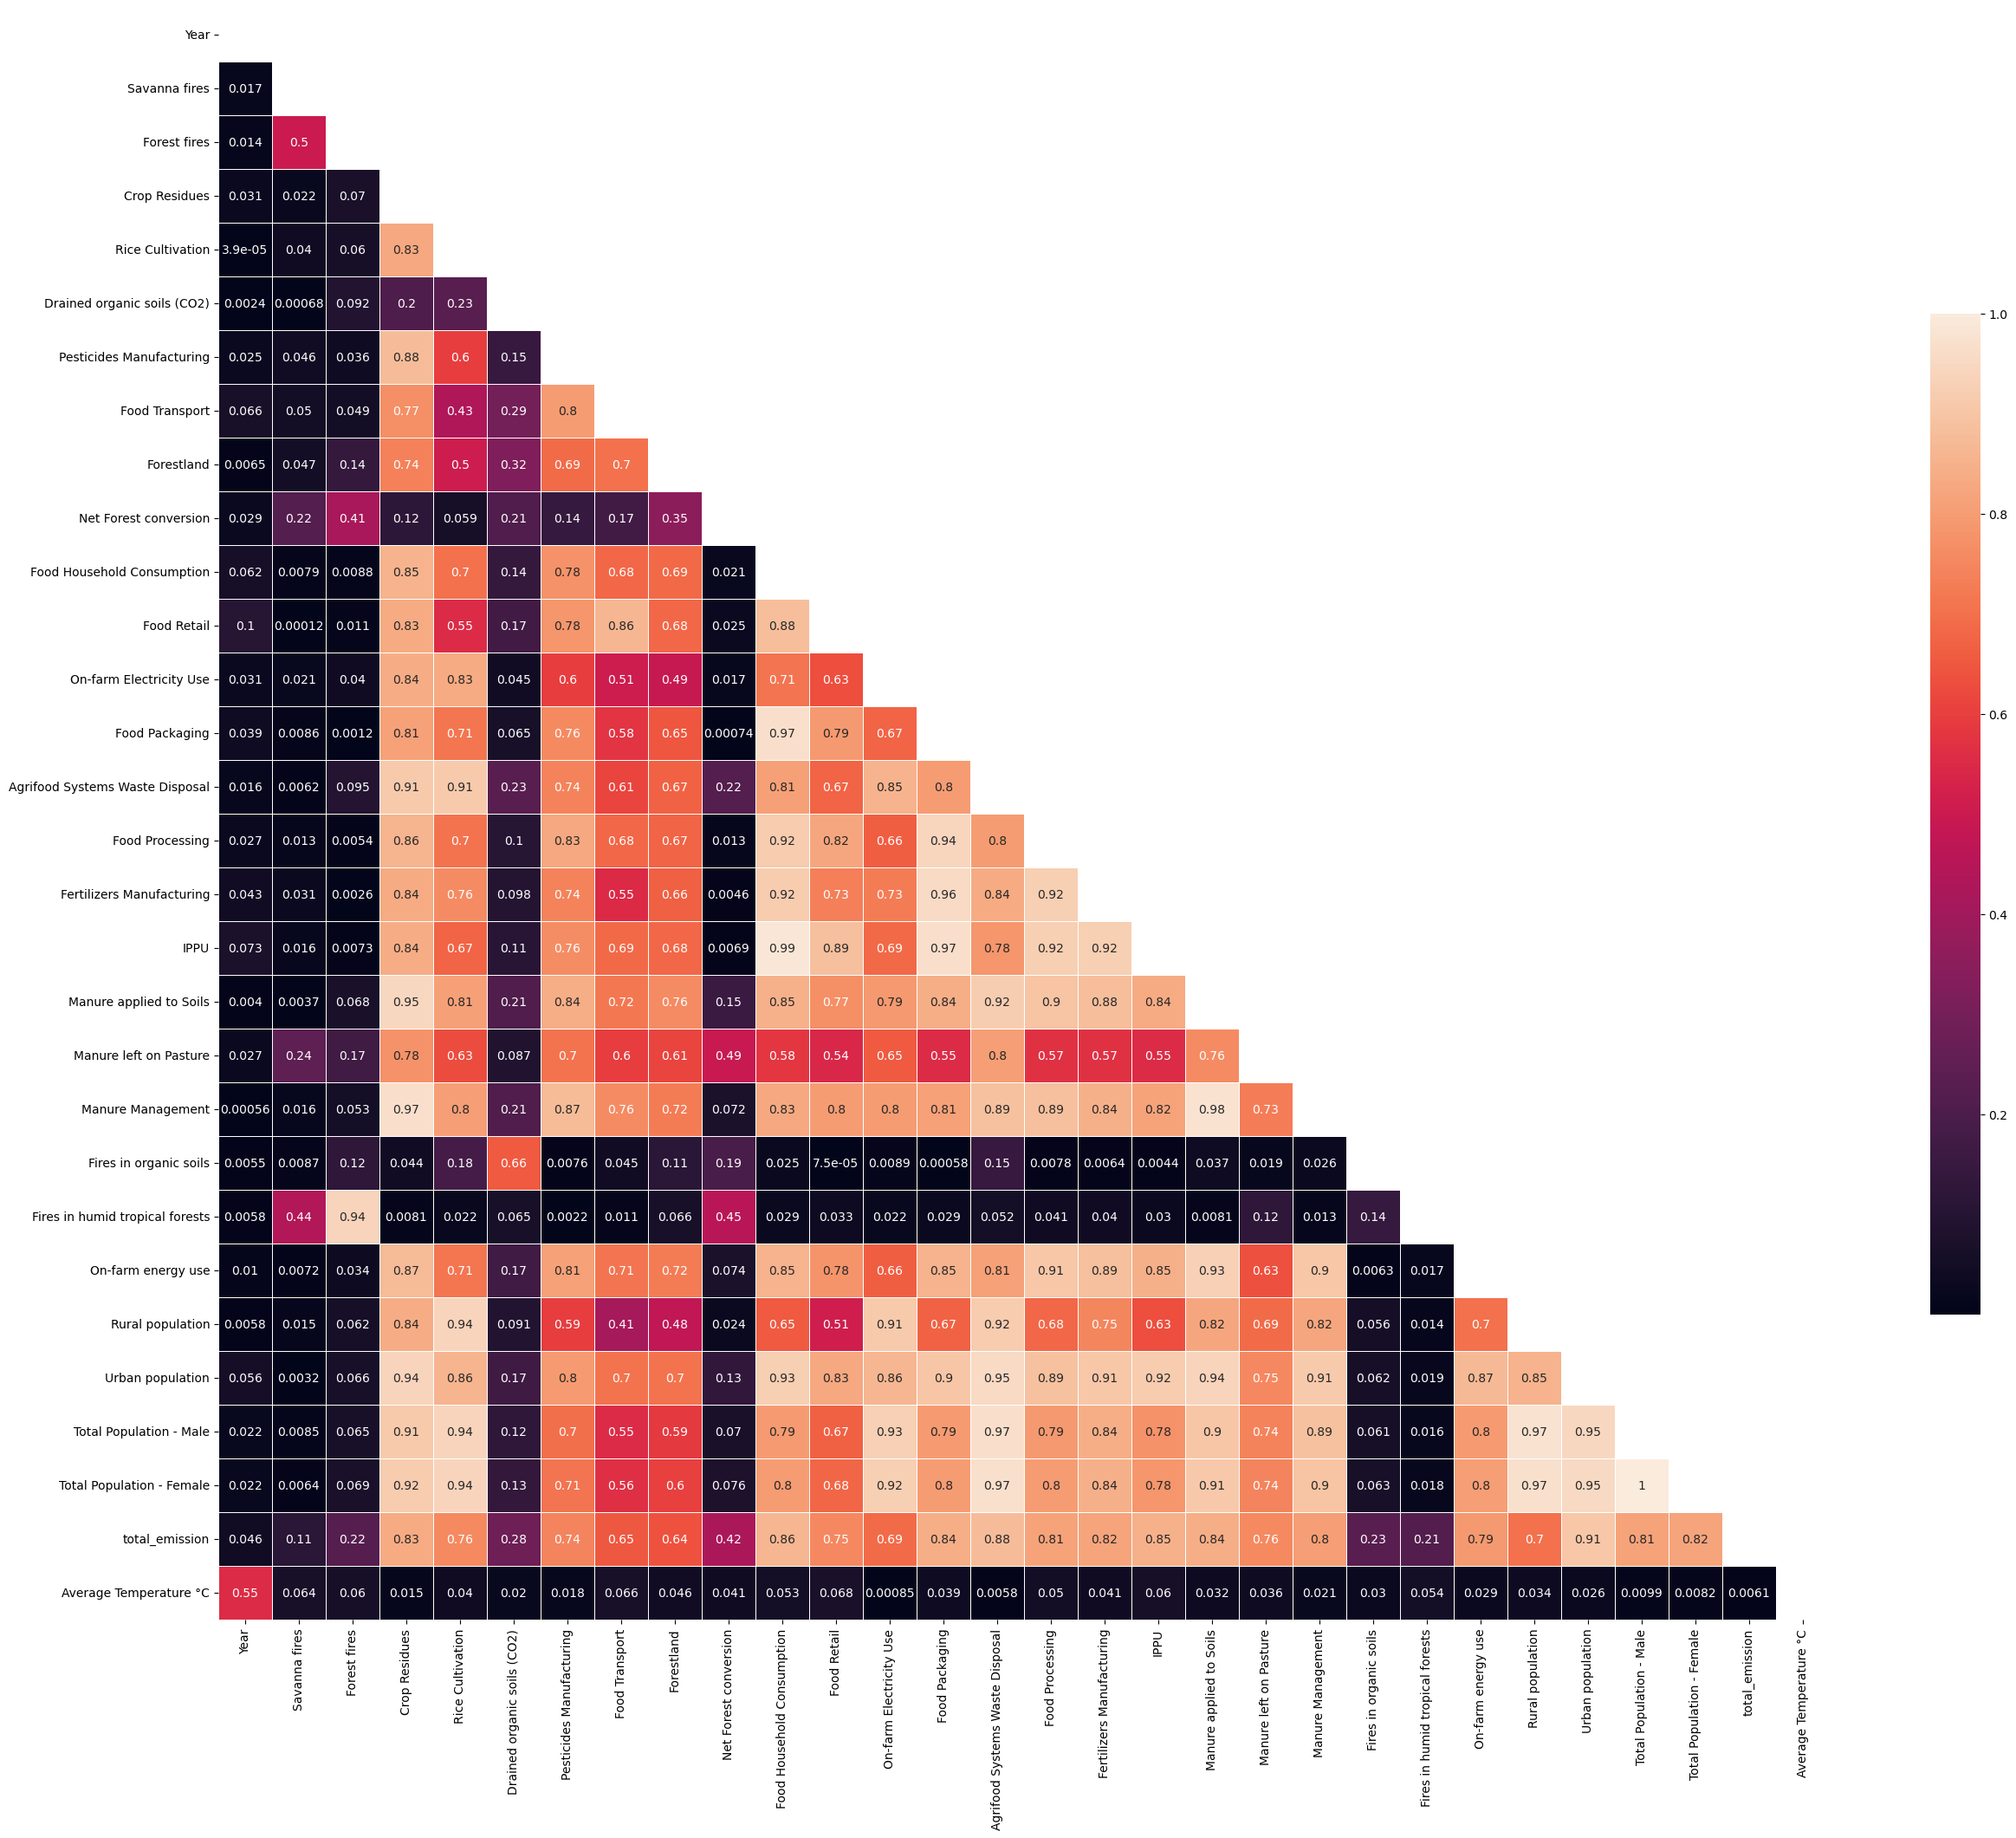

In [38]:
corr=np.abs(df.drop(columns = ['Area']).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [39]:
# From the features, drop the columns that have a correlation with "Average Temperature" lower than 5 %.
# Use linear regression.
# Use standarization.
# I could also drop columns that are closely correlated to each other.

# NOT DONE.

In [40]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
lin_reg = LinearRegression()

In [42]:
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [43]:
pred = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 0.3601686665777755
RMSE 0.47656366537448874
R2 score 0.350969571054877


C:\Users\aican\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# Linear Regression yielding a worse score than our previous model, KNN.

In [45]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm.columns, lin_reg.coef_)}
lin_reg_coef

{'Year': 1.1097307737104225,
 'Savanna fires': -2.773541895301296,
 'Forest fires': -1.8953292209658705,
 'Crop Residues': -0.11765031041329287,
 'Rice Cultivation': -5.0190343592652376,
 'Drained organic soils (CO2)': -5.557998187077169,
 'Pesticides Manufacturing': -1.1332741755435465,
 'Food Transport': -0.848109087756127,
 'Forestland': -23.537311844386597,
 'Net Forest conversion': -38.000722358434956,
 'Food Household Consumption': -10.845185774305737,
 'Food Retail': -5.3798881989210905,
 'On-farm Electricity Use': -3.133185357291677,
 'Food Packaging': -3.1564258472728737,
 'Agrifood Systems Waste Disposal': -4.4002734125995735,
 'Food Processing': -6.417752153533482,
 'Fertilizers Manufacturing': -6.352801380606637,
 'IPPU': -42.50797913962736,
 'Manure applied to Soils': 1.4047398557494883,
 'Manure left on Pasture': -3.41718955968582,
 'Manure Management': -1.57049667013269,
 'Fires in organic soils': -24.33317548840982,
 'Fires in humid tropical forests': -0.779109893847361

In [46]:
# We can conclude that 'total_emission': 83.70235807043375 has the highest impact in our model.

In [47]:
# Removing Features (drop columns) with Low Correlation with the target variable. They don't contribute much to predicting the target.
# Which ones? 